In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mutual_information(p, data, bin_p=20, bin_data=30):
    
    x = p
    y = data

    support_x = np.linspace(min(x), max(x), bin_p)
    support_y = np.linspace(min(y), max(y), int(len(data)/bin_data))

    summation = 0.00
    for a in range(len(support_x)-1):
        for b in range(len(support_y)-1):
            ind_x = np.where((x>=support_x[a]) & (x<=support_x[a+1]))[0]
            ind_y = np.where((y>=support_y[b]) & (y<=support_y[b+1]))[0]

            px = len(ind_x) / len(x)
            py = len(ind_y) / len(x)
            pxy = len(np.where(np.in1d(ind_x, ind_y)==True)[0]) / len(x)

            if pxy>0.00: summation += pxy * np.log2(pxy / (px*py))

    return summation

def regress(ax, p, data, line=True, color='r', lw=2) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept

    if line is True : ax.plot(x_test, fitLine, c=color, linewidth=lw)
    
    mi = mutual_information(p, data)
    return ax, r_, mi


In [3]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')
full = e.Full_list(modes_bcp=None)

In [4]:
sujets = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10',  's11', 's12']

v_anti, old_anti = [], []
for s in sujets :
    filename = '../parametre/fct_velocity_sigmo/param_Fit_%s_fct_velocity_sigmo.pkl'%(s)
    with open(filename, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    for b in range(3) :
        old_anti.append(param['old_anti'][b])
    v_anti.extend(full[full.sujet==s].va.values.tolist())
    
# masque les essais qui où full_result = NAN
old_anti = np.ma.masked_array(old_anti, mask=np.isnan(v_anti)).compressed()/10
v_anti = np.ma.masked_array(v_anti, mask=np.isnan(v_anti)).compressed()


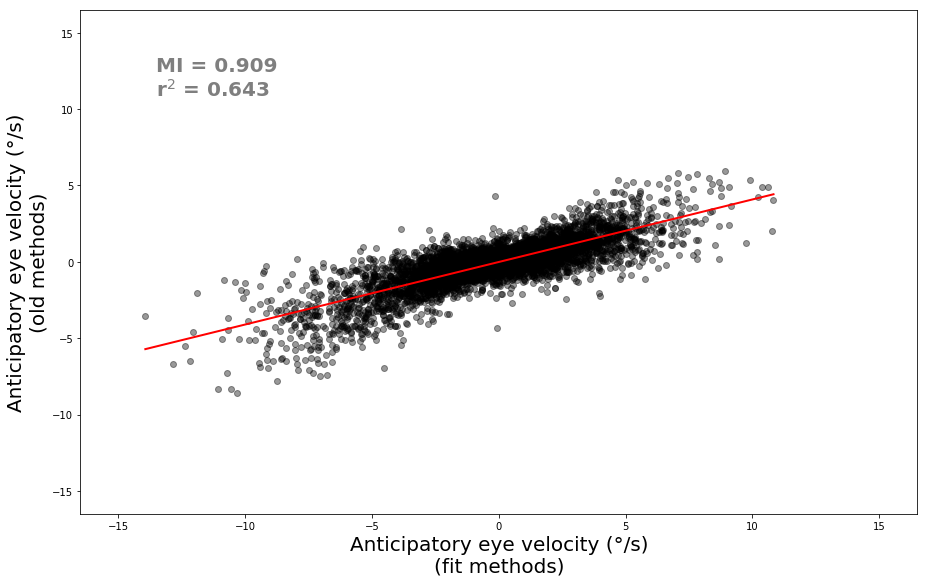

In [5]:
fig, ax = plt.subplots(1 ,1, figsize=(15, 15/(1.6180)))


ax.scatter(v_anti, old_anti, c='k', alpha=.4)
ax.set_ylabel('Anticipatory eye velocity (°/s)\n(old methods)', fontsize=20)
ax.set_xlabel('Anticipatory eye velocity (°/s)\n(fit methods)', fontsize=20)

ax, r_, mi = regress(ax, v_anti, old_anti, line=True, color='r', lw=2)


ax.text(-15+(15/10), 15-(15/10), 'MI = %.3f\nr$^{2}$ = %.3f'%(mi, r_**2),
        alpha=.5, fontsize=20, va='top', ha='left',  weight='bold')

ax.axis([-16.5, 16.5, -16.5, 16.5])

plt.savefig('figures/old_v_anti__vs__fit_v_anti')